In [1]:
import sys
sys.path.append('../../')

import numpy as np
from qiskit import IBMQ, Aer, QuantumCircuit
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, measurement_process_tomography, tomographic_gate_set_tomography
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel
from utils_plots import *

In [2]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

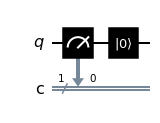

In [3]:
q1 = QuantumCircuit(1,1)
q1.measure(0,0)
q1.reset(0)
q1.draw( output='mpl' )

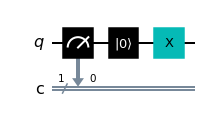

In [4]:
q2 = QuantumCircuit(1,1)
q2.measure(0,0)
q2.reset(0)
q2.x(0)
q2.draw( output='mpl' )

In [5]:
mpt1 = measurement_process_tomography( 1 )
mpt2 = measurement_process_tomography( 1 )
gst  = tomographic_gate_set_tomography( 1 )

In [6]:
circuits1 = mpt1.circuits(  )
circuits2 = mpt2.circuits( [ q1, q2 ] )
circuits3 = gst.circuits()

In [7]:
# simulator = Aer.get_backend('aer_simulator')
# job = simulator.run( circuits, shots=2**13 )
# results = job.result()

In [8]:
backend = provider.get_backend('ibm_perth')
# job = backend.run( circuits, shots=2**13 )
# job.job_id()

In [9]:
# perth '6335b371d95c8e323862e64a'
# lagos '6335b3bee150f1db2f9e2919'

In [10]:
results = backend.retrieve_job('6335b371d95c8e323862e64a').result()

In [11]:
results_gate_set = gst.fit( results )
gate_set = [ results_gate_set.states, results_gate_set.measurements, results_gate_set.processes ]
states, measurements = gst.gateset2spam( gate_set ) 

In [12]:
results_tomo_1 = mpt1.fit( results, gate_set= [states, measurements] )
choi1 = results_tomo_1.chois[0]
povm1  = results_tomo_1.povms[0]
Quantities( povm1, choi1 )

(0.9806309572292493, 0.950229132284339, 0.9681368769727189)

In [13]:
results_tomo_2 = mpt2.fit( results, gate_set= [states, measurements] )
choi2 = results_tomo_2.chois[0]
povm2  = results_tomo_2.povms[0]
Quantities( povm2, choi2 )

(0.9832301500785792, 0.9726485073507707, 0.9831415036383431)

[<Axes3DSubplot:>, <Axes3DSubplot:>]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


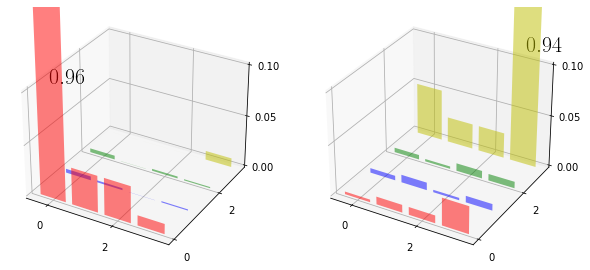

In [14]:
Plot_Chois( choi1 )

[<Axes3DSubplot:>, <Axes3DSubplot:>]

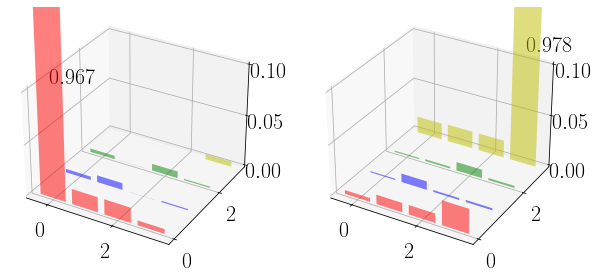

In [15]:
Plot_Chois( choi2 )